<h1 align="center">Оценка качества моделей и отбор признаков</h1>

МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Зухба Анастасия, a__l@mail.ru

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: В каких ситуациях полезно использовать AUC-ROC?

Когда количество классов сбалансированное, для оценки общего качества модели.

**Вопрос 2**: Когда использование precision/recall предпочтительнее, чем AUC-ROC?

Когда количество классов не сбалансированное.

**Вопрос 3**: Для чего используются внутренние критерии, а для чего внешние?

По внутренним критериям оценивается качество модели на обучающей выборке (сложность, логичность), по вннешним - на контрольной выборке.

**Вопрос 4**: Чем эмпирические критерии отличаются от аналитических?

Эмпирические критерии оценивают качество на некоторых разбиениях на тестовую и контрольную выборку. Аналитичские - на обучающей выборке без разбиений, но но со штрафом за сложность модели.

**Вопрос 5**: Что такое критерий регуляризации?

Внутренний критерий с добавленным штрафом за сложность модели

# Определение спама по тексту электронного письма

Попробуем при помощи моделей машинного обучения построить алгоритм, отделяющий спам от нормальной почты. Для экспериментов воспользуемся небольшим набором данных с UCI. Объекты в датасете соответствуют письмам, которые описаны признаками на основе текста письма, спам — положительный пример для классификации, хорошее письмо — отрицательный пример.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка датасета Spambase

In [2]:
import pandas
import urllib2

SPAMBASE_NAMES_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'
SPAMBASE_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

feature_names = [
    line.strip().split(':')[0] 
    for line in urllib2.urlopen(SPAMBASE_NAMES_URL).readlines()[33:]
]
spam_data = pandas.read_csv(SPAMBASE_DATA_URL, header=None, names=(feature_names + ['spam']))
 
X, y = spam_data.ix[:, :-1].values, spam_data.ix[:, -1].values
 
spam_data.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...   char_freq_;  char_freq_(  \
0             0.00            0.00  ...          0.00        0.000   
1             0.00            0.94  ...          0.00        0.132   
2             0.64            0.25  ...          0.01        0.143   
3             0.31            0.63  ...          0.00        0.137   
4             0.31            0.63  ...          0.00        0.135   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.778        0.000        0.000   
1          0.0        0.372        0.180        0.048   
2          0.0        0.276        0.184        0.010   
3          0.0        0.137        0.000        0.000   
4          0.0        0.135        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       3.756                          61   
1                       5.114                         101   
2                       9.821                         485   
3                       3.537                          40   
4                       3.537                          40   

   capital_run_length_total  spam  
0                       278     1  
1                      1028     1  
2                      2259     1  
3                       191     1  
4                       191     1  

[5 rows x 58 columns]

**Задание**
- Сколько примеров писем в датасете? 4600
- Какова доля плохих писем? 2788
- Какие характерные группы признаков представлены в наборе? Частота некоторых слов и символов, длина слов и текста 

In [10]:
print spam_data.shape[0]
print spam_data[spam_data['spam'] == 0].shape[0]
print spam_data.columns

4601
2788
Index([u'word_freq_make', u'word_freq_address', u'word_freq_all',
       u'word_freq_3d', u'word_freq_our', u'word_freq_over',
       u'word_freq_remove', u'word_freq_internet', u'word_freq_order',
       u'word_freq_mail', u'word_freq_receive', u'word_freq_will',
       u'word_freq_people', u'word_freq_report', u'word_freq_addresses',
       u'word_freq_free', u'word_freq_business', u'word_freq_email',
       u'word_freq_you', u'word_freq_credit', u'word_freq_your',
       u'word_freq_font', u'word_freq_000', u'word_freq_money',
       u'word_freq_hp', u'word_freq_hpl', u'word_freq_george',
       u'word_freq_650', u'word_freq_lab', u'word_freq_labs',
       u'word_freq_telnet', u'word_freq_857', u'word_freq_data',
       u'word_freq_415', u'word_freq_85', u'word_freq_technology',
       u'word_freq_1999', u'word_freq_parts', u'word_freq_pm',
       u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting',
       u'word_freq_original', u'word_freq_project', u'word_freq_re'

### Обучение классификатора и оценка его качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс: большой размер обучения ведет к более богатым информацией и качественным алгоритмам, большой размер контрольной выборки ведет к менее шумной оценке качества.

Для оценки качества классификации рассматривают матрицу ошибок: строчки соответствуют истинному классу, столбцы — предсказанному классификатором, ячейки содержат число примеров тестовой выборки.

<img src="confusion_matrix.png">

Диагональ матрицы ошибок содержит правильно классифицированные положительные (TP) и отрицательные (TN) примеры. False Positive (FP) — ошибки I рода (ложное срабатывание, положили в спам хорошее письмо), False Negative (FN) — ошибки II рода (не отфильтровали спам). Ошибки I и II рода могут иметь различную стоимость.

Часто рассматриваются следующие метрики качества бинарной классификации:

- Accuracy = (TP + TN) / (TP + TN + FP + FN) — доля правильных ответов
- Precision = TP / (TP + FP) — точность, доля спама среди писем, классифицированных как спам
- Recall = TP / (TP + FN) — полнота, доля спама, которая была отфильтрована
- F1 = 2TP / (2TP + FP + FN) — среднее гармоническое между точностью и полнотой

**Задание**
- Разбейте набор примеров на две непересекающиеся подвыборки следующим образом: train — первые 3000 примеров (≈65%), test — все остальные примеры.
- Обучите решающее дерево на train. Классифицируйте примеры из test. Посчитайте метрики качества классификации, описанные выше: Accuracy, Precision, Recall, F1. Рекомендованные параметры решающего дерева: разбиение по критерию gini, максимальная глубина: 7.
- Какие есть недостатки у получившейся оценки качества на подвыборке test? Как можно сделать оценку качества более информативной?  
**Тестовая выборка состояла только из экземпляров одного класса. Нужно перемешать выборку.**
- Повторите эксперимент, перемешав случайно объекты исходной выборки перед разбиением.
- Какие признаки оказались наиболее важными для определения спама? Воспользуйтесь оценками важности признаков, полученых при построении решающего дерева.
- Какое качество дает лучшая константная модель (определяющая класс определенно и вне зависимости от признаков)?
- Обучите модель KNN и оцените ее качество на test. Рекомендованные параметры: K=10, евклидова метрика в качестве расстояния.
- Обучите модель KNN, предварительно приведя значения признаков к одинаковому масштабу. Оцените качество полученной модели на test. Дает ли подобное преобразование признаков прирост качества для модели KNN? Проделайте тот же эксперимент с решающим деревом. Почему масштабирование признаков не влияет на качество решающего дерева, но повышает качество классификации модели KNN?
- Сравните все обученные модели по всем метрикам.


In [38]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [91]:
score = spam_data.spam
data = spam_data.drop('spam', 1)
X_train, X_test, y_train, y_test = data[:3000], data[3000:], score[:3000], score[3000:]

In [92]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=7, criterion='gini')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'Accuracy: ', metrics.accuracy_score(pred, y_test)
print 'Precision: ', metrics.precision_score(pred, y_test)
print 'Recall: ', metrics.recall_score(pred, y_test)
print 'F1: ', metrics.f1_score(pred, y_test)

Accuracy:  0.770143660212
Precision:  0.0
Recall:  0.0
F1:  0.0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(data, score, train_size=3000)

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=7, criterion='gini')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'Accuracy: ', metrics.accuracy_score(pred, y_test)
print 'Precision: ', metrics.precision_score(pred, y_test)
print 'Recall: ', metrics.recall_score(pred, y_test)
print 'F1: ', metrics.f1_score(pred, y_test)

Accuracy:  0.909431605247
Precision:  0.869905956113
Recall:  0.899513776337
F1:  0.884462151394


In [55]:
most_inportant = sort(clf.feature_importances_)[:-10:-1]
for col in xrange(len(data.columns)):
    if clf.feature_importances_[col] in most_inportant:
        print data.columns[col],  clf.feature_importances_[col]

word_freq_remove 0.132936679982
word_freq_free 0.0459734203774
word_freq_money 0.0169507245583
word_freq_hpl 0.0524095271406
word_freq_george 0.0148850216961
word_freq_edu 0.0359376580163
char_freq_! 0.427749728372
char_freq_$ 0.0457556913314
capital_run_length_total 0.117019364475


In [66]:
print 'Constant classifier accuracy:'
print 'Accuracy: ', metrics.accuracy_score(score, np.zeros(score.shape[0]))
print 'Precision: ', metrics.precision_score(score, np.zeros(score.shape[0]))
print 'Recall: ', metrics.recall_score(score, np.zeros(score.shape[0]))
print 'F1: ', metrics.f1_score(score, np.zeros(score.shape[0]))

Constant classifier accuracy:
Accuracy:  0.605955227125
Precision:  0.0
Recall:  0.0
F1:  0.0


In [64]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'Accuracy: ', metrics.accuracy_score(pred, y_test)
print 'Precision: ', metrics.precision_score(pred, y_test)
print 'Recall: ', metrics.recall_score(pred, y_test)
print 'F1: ', metrics.f1_score(pred, y_test)

Accuracy:  0.786383510306
Precision:  0.67868338558
Recall:  0.759649122807
F1:  0.716887417219


In [70]:
from sklearn import preprocessing
spam_scaled = preprocessing.scale(data)
X_train, X_test, y_train, y_test = train_test_split(spam_scaled, score, test_size=0.35)
clf = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'Accuracy: ', metrics.accuracy_score(pred, y_test)
print 'Precision: ', metrics.precision_score(pred, y_test)
print 'Recall: ', metrics.recall_score(pred, y_test)
print 'F1: ', metrics.f1_score(pred, y_test)

Accuracy:  0.903165735568
Precision:  0.820261437908
Recall:  0.916058394161
F1:  0.865517241379


In [138]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=7, criterion='gini')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'Accuracy: ', metrics.accuracy_score(pred, y_test)
print 'Precision: ', metrics.precision_score(pred, y_test)
print 'Recall: ', metrics.recall_score(pred, y_test)
print 'F1: ', metrics.f1_score(pred, y_test)

Accuracy:  0.917551530294
Precision:  0.87216828479
Recall:  0.910472972973
F1:  0.890909090909


### Выводы

При использовании масштабирования качество KNN существенно увеличилось, качество DecisionTree немного уменьшилось.

Это связано с тем, что KNN использует расстояние меджу признаками, поэтому на немасштабированных данных будут неверно определяться наиважные признаки.

DecisionTree использует относительное расположение, поэтому масштабирование ничего не даетю

В итоге должны быть построены и сравнены между собой следующие модели:

1) Константная модель
2) Решающее дерево
3) KNN
4) KNN с масштабированием признаков

**По полученным данным видно, что лучше всего работает решающее дерево, далее масштабированный knn, потом обычный knn, и хуже всего, очевидно, константная модель**

### Выбор порога классификации

Многие модели классификации получают оценку принадлежности положительному классу $y'(x)\in R$. Затем принимают решение о классе объекта путем сравнения оценки с порогом: $y(x)=+1$, если $y'(x)<\theta$, $y(x)=−1$, если $y'(x)\geq\theta$

Матрица ошибок и все производные от нее метрики (Accuracy, Precision, Recall, etc.) зависят от порога $\theta$.


<img src="binary_threshold.png">

Для того чтобы видеть изменения метрик при всех значениях порога классификации, рассматривают координатную плоскость, по осям которой отложены значения метрик, а качество работы классификатора представлено в виде кривой — траектории изменения соответствующих метрик при варьировании порога:

<img src="roc_trajectory.png">

Наиболее распространены ROC-кривые (плоскость TP-vs-FP) и Precision/Recall кривые. Аббревиатура ROC (Receiver Operating Characteristic) была унаследована из инженерного дела.

<img src="roc_and_pr_curves.png">

В случае, если необходимо сравнить качество классификаторов вне зависимости от порога, применяют интегральные числовые метрики, например AUC-ROC (Area Under ROC) — площадь под ROC-кривой классификатора. AUC-ROC идеально работающего классификатора равно 1. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.



**Задача 1**

 Определите функционал «доля дефектных пар» для задачи бинарной классификации. Как данный функционал связан с AUC-ROC?

доля дефектных пар = $\frac{1}{l(l-1)} \sum_{i=0}^m \sum_{j=0}^n I_{p(x_j) > p(x_i)}$, где

$X^l$ - выборка, 
$m$ - количество объектов из класса 0,
$n$ - количество объектов из класса 1,
$p(x_i)$ - вероятность того, что $x_i$ принадлежит классу 1, ответ нашего классификатора,

ROC-AUC = $\frac{1}{mn} \sum_{i=0}^m \sum_{j=0}^n I_{p(x_i) > p(x_j)} $

значит доля дефектных пар $= \frac{ROC-AUC*mn}{l(l-1)} $

**Задача 2**

Приведите пример целевого вектора $y_1, \ldots , y_l$ и ответов алгоритма $b(x_1),\ldots,b(x_l)$, для которых AUC-ROC будет равен 0.5.

$y = (1,0,1,0)$

$b = (1,1,1,1)$

**Задание**

 Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с порогом? ** да**. В KNN оценкой принадлежности является *количество соседей с классом 1* делить на k,  порог = 0.5. В дереве сравниваем с порогом 0.5 в каждом листе. 

 
 Что это за оценки принадлежности? **Вероятность принадлежности классу.**
 
 Для всех моделей, построенных в предыдущем задании:
- Постройте ROC и Precision/Recall кривые в одних координатных осях, линиями разных цветов. Добавьте легенду: какая кривая соответствует какому классификатору.
- Сравните значения AUC-ROC.

Какой максимальной полноты определения спама достигают построенные классификаторы, если перед вами стоит жесткое ограничение: точность классификатора не может быть меньше 90%?

In [131]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
tree = DecisionTreeRegressor(max_depth = 7).fit(X_train, y_train)
knn = KNeighborsRegressor().fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [140]:
tree = DecisionTreeClassifier(max_depth=7, criterion='gini').fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)

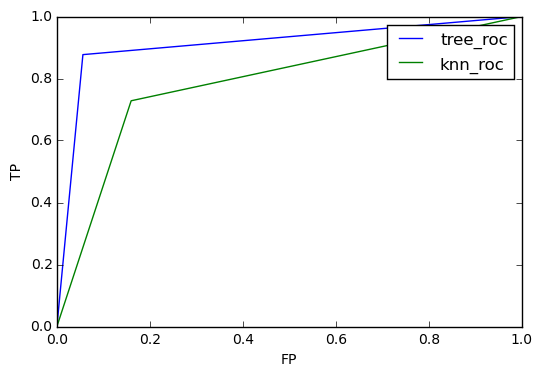

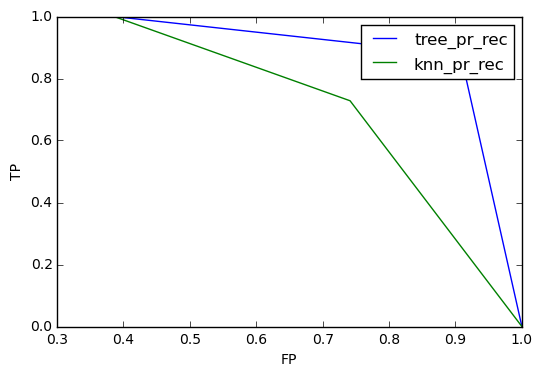

In [141]:
fp1, tp1, _ = metrics.roc_curve(y_test, y_pred_tree)
fp2, tp2, _ = metrics.roc_curve(y_test, y_pred_knn)
plt.plot(fp1, tp1, label='tree_roc')
plt.plot(fp2, tp2, label='knn_roc')
plt.xlabel('FP')
plt.ylabel('TP')
plt.legend()
plt.show()
fp1, tp1, _ = metrics.precision_recall_curve(y_test, y_pred_tree)
fp2, tp2, _ = metrics.precision_recall_curve(y_test, y_pred_knn)
plt.plot(fp1, tp1, label='tree_pr_rec')
plt.plot(fp2, tp2, label='knn_pr_rec')
plt.xlabel('FP')
plt.ylabel('TP')
plt.legend()
plt.show()

In [142]:
print 'ROC-AUC for tree: ', metrics.roc_auc_score(y_pred_tree, y_test)
print 'ROC-AUC for knn: ', metrics.roc_auc_score(y_pred_knn, y_test)

ROC-AUC for tree:  0.916087742831
ROC-AUC for knn:  0.786168410794


### Кросс-валидация и подбор параметров

Каждая модель машинного обучения имеет множество структурных параметров и параметров обучения: число соседей и тип функции расстояния в KNN, максимальная высота дерева, минимальное число объектов в листе дерева и т.д. Нет универсальных наборов параметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор параметров.

Для оптимизации параметров модели часто используют перебор по сетке (grid search): для каждого параметра выбирается несколько значений, перебираются все комбинации значений параметров и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется).

Сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит переобучение на тестовую выборку.

Для устранения этой проблемы, данные разбивают на 3 непересекающихся подвыборки: обучение (train), валидация (validation) и контроль (test).

Валидационную подвыборку используют для сравнения моделей, а test — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.

Более надежный способ объективного сравнения моделей — кросс-валидация. Существуют различные схемы кросс-валидации:

- Leave-One-Out
- K-Fold
- Многократное случайное разбиение выборки
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинаций. С учетом конечности времени на выполнение задания, возникает ряд компромиссов:

- сетку можно делать более разреженной, перебирая меньше значений каждого параметра, но в таком случае можно пропустить хорошую комбинацию параметров;
- кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
- параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
- перебирать не все комбинации параметров, а небольшое число случайно выбранных.

**Задание**
- Выберите схему кросс-валидаци, одну из перечисленных выше. Зафиксируйте разбиение кросс-валидации обучающей выборки. Кросс-валидировать нужно по выборке train из предыдущих заданий, test должен остаться независимым. Обратите внимание: при сравнении моделей, набор разбиений кросс-валидации не должен меняться, должен быть строго фиксированным.
- Выберите одну метрику, которую будете оптимизировать при переборе параметров. Например, можно взять AUC-ROC.
- Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе (или часть из этих параметров).
- Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания (или часть из этих параметров).
- Сравните полученные модели с моделями из предыдущих заданий. Сравнение необходимо проводить на тестовой выборке, которая не участвовала в подборе и обучении. Сравнение нужно проводить только по метрике которая оптимизировалась.

**Схема кросс-валидации - жадная. Будем использовать grig_search, Метрика - f1**

In [107]:
from sklearn.grid_search import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data, score, train_size=3000)

In [108]:
param_test = {'criterion':('gini', 'entropy')}
gsearch = GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.87694, std: 0.00753, params: {'criterion': 'gini'},
  mean: 0.88370, std: 0.00425, params: {'criterion': 'entropy'}],
 {'criterion': 'entropy'},
 0.88370313932544187)

In [109]:
param_test = {'max_depth':[3, 5, 7, 9, 11]}
gsearch = GridSearchCV(estimator = tree.DecisionTreeClassifier(criterion='gini'), param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.85327, std: 0.01546, params: {'max_depth': 3},
  mean: 0.87725, std: 0.01470, params: {'max_depth': 5},
  mean: 0.89378, std: 0.01269, params: {'max_depth': 7},
  mean: 0.89049, std: 0.00949, params: {'max_depth': 9},
  mean: 0.88582, std: 0.00477, params: {'max_depth': 11}],
 {'max_depth': 7},
 0.89377518966943215)

In [112]:
param_test = {'min_samples_leaf' :[1, 3, 5, 7, 9]}
gsearch = GridSearchCV(estimator = tree.DecisionTreeClassifier(criterion='gini', max_depth=7), param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.89351, std: 0.01338, params: {'min_samples_leaf': 1},
  mean: 0.89285, std: 0.01321, params: {'min_samples_leaf': 3},
  mean: 0.88094, std: 0.01960, params: {'min_samples_leaf': 5},
  mean: 0.88307, std: 0.01145, params: {'min_samples_leaf': 7},
  mean: 0.88446, std: 0.01843, params: {'min_samples_leaf': 9}],
 {'min_samples_leaf': 1},
 0.89351114909563911)

In [129]:
clf = tree.DecisionTreeClassifier(max_depth=7, criterion='gini', min_samples_leaf=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'F1: ', metrics.f1_score(pred, y_test)

F1:  0.890354492993


In [128]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'F1: ', metrics.f1_score(pred, y_test)

F1:  0.890453834116


In [123]:
param_test = {'metric':('manhattan', 'euclidean')}
gsearch = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.76709, std: 0.02424, params: {'metric': 'manhattan'},
  mean: 0.71524, std: 0.03477, params: {'metric': 'euclidean'}],
 {'metric': 'manhattan'},
 0.7670857286414996)

In [124]:
param_test = {'n_neighbors':[1, 3, 5, 7, 9]}
gsearch = GridSearchCV(estimator = KNeighborsClassifier(metric='manhattan'), param_grid = param_test, scoring='f1',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.77309, std: 0.01329, params: {'n_neighbors': 1},
  mean: 0.76591, std: 0.01666, params: {'n_neighbors': 3},
  mean: 0.76709, std: 0.02424, params: {'n_neighbors': 5},
  mean: 0.76805, std: 0.03023, params: {'n_neighbors': 7},
  mean: 0.75987, std: 0.02621, params: {'n_neighbors': 9}],
 {'n_neighbors': 1},
 0.77308523114112948)

In [127]:
clf = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'F1: ', metrics.f1_score(pred, y_test)

F1:  0.779365079365


In [125]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print 'F1: ', metrics.f1_score(pred, y_test)

F1:  0.734693877551


В knn улучшили, в decision tree нет((

<h1 align="center">Примеры</h1> 

## Обучение решающего дерева

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris_data = load_iris()
X, y = iris_data.data, iris_data.target

clf = DecisionTreeClassifier(max_depth=3).fit(X, y)

y_pred = clf.predict(X)

#### Важность признаков

Важность признаков вычисляется на основании частоты разбиения по признаку и глубины узлов дерева в которых происходило разбиение по признаку.

In [4]:
most_important_features = argsort(clf.feature_importances_)[::-1]
for idx in most_important_features:
    print '%d %s, importance = %.2f' % (idx, iris_data.feature_names[idx], clf.feature_importances_[idx])

3 petal width (cm), importance = 0.95
2 petal length (cm), importance = 0.05
1 sepal width (cm), importance = 0.00
0 sepal length (cm), importance = 0.00


#### Ошибочно классифицированные объекты обучающей выборки

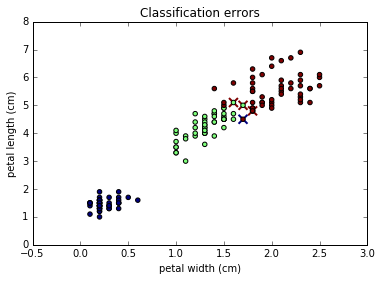

In [5]:
xind, yind = most_important_features[0], most_important_features[1]
err = (y != y_pred)
scatter(X[err, xind], X[err, yind], c=y_pred[err], marker='x', s=80, linewidths=2)
scatter(X[:, xind], X[:, yind], c=y)
xlabel(iris_data.feature_names[xind])
ylabel(iris_data.feature_names[yind])
title(u'Classification errors')

#### Визуализация дерева

In [6]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file='tree.dot', feature_names=iris_data.feature_names)

In [7]:
!dot -Tpng tree.dot -o tree.png

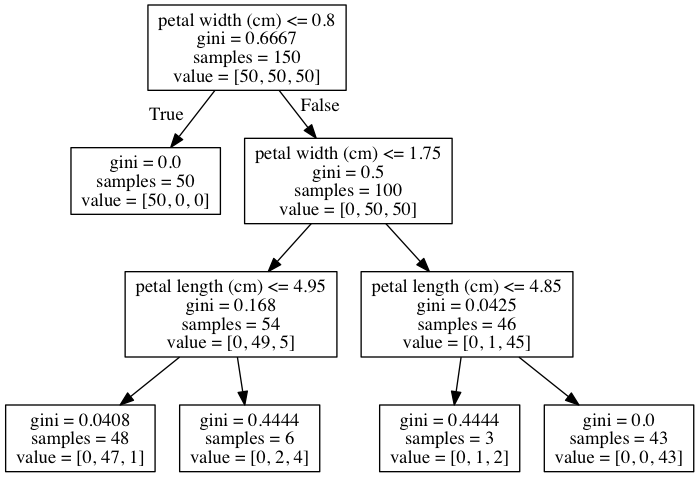

In [8]:
from IPython.display import Image
Image('tree.png')

## Кросс-валидация

In [9]:
from sklearn.datasets import load_boston
boston_data = load_boston()
X, y = boston_data.data, boston_data.target

Зафиксируем разбиение для 5-fold кросс-валидации.

In [10]:
from sklearn.cross_validation import KFold
cv = KFold(n=len(y), n_folds=5, shuffle=True, random_state=123)

Обратите внимание на аргументы:
 

- shuffle=True — без него фолды будут формироваться из последовательно идущих объектов, что нехорошо — в этом поможет убедиться задание в части 2;
- random_state — если этот параметр не выставить, то после каждого запуска команды будет генерироваться новое разбиение на фолды; крайне желательно, чтобы ваши эксперименты были в точности воспроизводимы — это упрощает исследования.


Оценим качество регрессии KNN на наборе Boston Housing для различных значений K (число соседей). В качестве метрики качества возьмем модуль отклонения:

 $MAE=\sum_i|y_{pred,i}-y_i|$


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

Переберем ряд значений n_neigbors, для каждого оценим среднее и стандартное отклонение MAE по кросс-валидации. Магия %%time позволяет измерить время работы ячейки с кодом.

In [12]:
%%time 

k_values = range(1, 10) + range(10, 50, 5)
mae_cv_mean = []
mae_cv_std = []

for k in k_values:
    clf = KNeighborsRegressor(n_neighbors=k)
    mae_folds = -cross_val_score(clf, X, y, cv=cv, scoring='mean_absolute_error')
    mae_cv_mean.append(mae_folds.mean())
    mae_cv_std.append(mae_folds.std())

CPU times: user 390 ms, sys: 23 ms, total: 413 ms
Wall time: 461 ms


#### График, демонстрирующий оптимальность выбора числа соседей

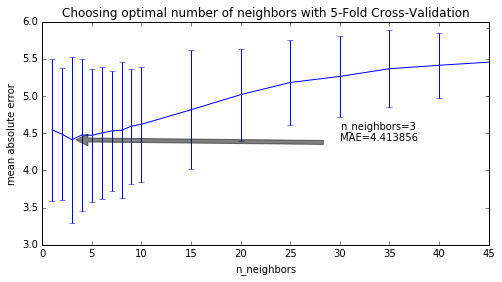

In [13]:
figure(figsize=(8, 4))
errorbar(k_values, mae_cv_mean, yerr=array(mae_cv_std)*2)
title('Choosing optimal number of neighbors with 5-Fold Cross-Validation')
xlabel('n_neighbors')
ylabel('mean absolute error')

opt_idx = argmin(mae_cv_mean)
optimal_k = k_values[opt_idx]
optimal_mae = mae_cv_mean[opt_idx]
annotate('n_neighbors=%d\nMAE=%f' % (optimal_k, optimal_mae), 
         xy=(opt_idx, optimal_mae), xytext=(30, optimal_mae), 
         arrowprops=dict(facecolor='black', shrink=0.05, alpha=0.5))